# **COVID CRASH DATA VISUALIZATION**

- Language: Python
- Libraries: 
  - Data set: yfinance
  - data managment: Pandas, Numpy, seaborn
  - plotting: Pandas, seaborn, squarify,  Matplotlib
  - others: datetime


## **Introduction**

On February 20 2020, stock markets around the world suddenly collapsed due to growing instability due to the COVID-19 pandemic. The descent ended on 23 March 2020.

With the next data visualizations I want to analyze the trend differences between the **S&P 500** (an ETF (basket of stocks), which contains all the most important assets of the American market) and **Bitcoin**.

## Cryptocurrencies

Before analyzing the 2020 bear market, I will do a quick overview of cryptocurrencies. 
cryptocurrencies are not really currencies understood as euro or dollar, they are described more as digital assets that can also have the function of exchanging value. A digital asset is as if it were an action, therefore representing a company, a project, fundamental values.

## Bitcoin data fetch and management

Through the library yfinance made available by Yahoo Finance and Pandas we can easily recover the set of data useful for analyzing **Bitcoin** for the period that we decide through the datetime library.
Pandas ci permette di creare automaticamente un dataframe that organizes the collected data in a clearer and simpler way than the Python dictionary.


In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 9.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
from datetime import datetime, date

start = datetime(2015, 1, 1)
end = date.today()

In [5]:
import yfinance as yf
from pandas_datareader import data as pd

yf.pdr_override()

btc_data = pd.get_data_yahoo("BTC-USD", start=start, end=end)
btc_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [6]:
btc_data.loc['2017-01-01':'2017-12-31']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...
2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,15838.500000,12487600128
2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,14606.500000,12336499712
2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,14656.200195,13025500160


## Plotting and styling Bitcoin dataset

We can plot the dataset already with Pandas but to have more control over the graph we use the Matplotlib library.
Using the different functions of Matplotlib we can customize and make the graphs more effective.

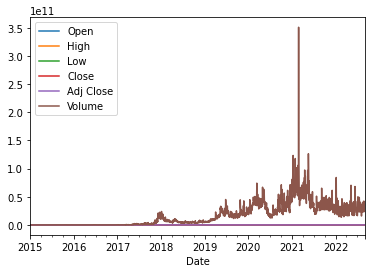

In [7]:
btc_data.plot()

In [8]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


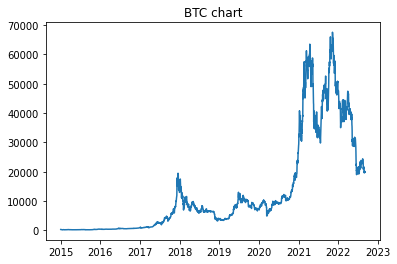

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(btc_data.index.values, btc_data['Close'])

plt.title('BTC chart')
plt.show()

<BarContainer object of 2805 artists>

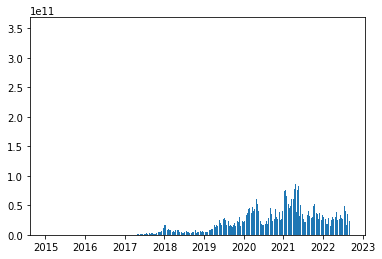

In [10]:
fig, ax = plt.subplots()

ax.bar(btc_data.index.values, btc_data['Volume'])

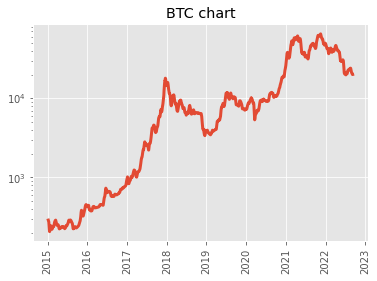

In [11]:
import matplotlib.style as style

style.use('ggplot')
btc = btc_data.rolling(8).mean()

fig, ax = plt.subplots()

ax.plot(btc.index.values, btc['Close'], linewidth=3)

ax.set_yscale('log')
plt.xticks(rotation='vertical')
plt.title('BTC chart')
plt.show()

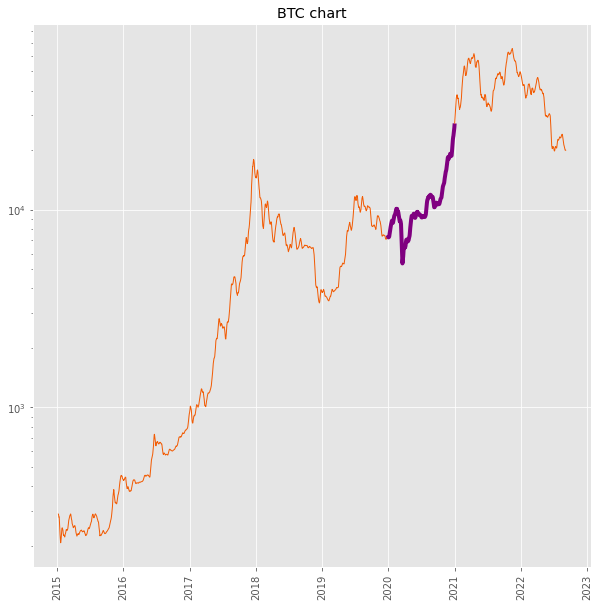

In [12]:
pre_btc_2020 = btc.loc[:'2019-12-31']
in_btc_2020 = btc.loc['2020-01-01':'2020-12-31']
post_btc_2020 = btc.loc['2021-01-01':]

fig, ax = plt.subplots(figsize=(10,10))

ax.set_yscale('log')

ax.plot(pre_btc_2020.index.values, pre_btc_2020['Close'], linewidth=1, color='#F25C05')
ax.plot(in_btc_2020.index.values, in_btc_2020['Close'], linewidth=4, color='#800080')
ax.plot(post_btc_2020.index.values, post_btc_2020['Close'], linewidth=1, color='#F25C05')

plt.title('BTC chart')
plt.xticks(rotation='vertical')


plt.show()

## Why Bitcoin?



In [13]:
btc_mcap = pd.get_quote_yahoo("BTC-USD")['marketCap']

btc_mcap.head()

BTC-USD    379246837760
Name: marketCap, dtype: int64

In [14]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pa

eth_mcap = pd.get_quote_yahoo("ETH-USD")['marketCap']
ada_mcap = pd.get_quote_yahoo("ADA-USD")['marketCap']
bnb_mcap = pd.get_quote_yahoo("BNB-USD")['marketCap']
xrp_mcap = pd.get_quote_yahoo("XRP-USD")['marketCap']
sol_mcap = pd.get_quote_yahoo("SOL-USD")['marketCap']
doge_mcap = pd.get_quote_yahoo("DOGE-USD")['marketCap']
dot_mcap = pd.get_quote_yahoo("DOT-USD")['marketCap']
trx_mcap = pd.get_quote_yahoo("TRX-USD")['marketCap']
shib_mcap = pd.get_quote_yahoo("SHIB-USD")['marketCap']
avax_mcap = pd.get_quote_yahoo("AVAX-USD")['marketCap']
usdt_mcap = pd.get_quote_yahoo("USDT-USD")['marketCap']
usdc_mcap = pd.get_quote_yahoo("USDC-USD")['marketCap']
matic_mcap = pd.get_quote_yahoo("MATIC-USD")['marketCap']
cro_mcap = pd.get_quote_yahoo("CRO-USD")['marketCap']
ltc_mcap = pd.get_quote_yahoo("LTC-USD")['marketCap']

cryptocurrencies = [btc_mcap, eth_mcap, usdt_mcap, usdc_mcap, bnb_mcap,ada_mcap, xrp_mcap, sol_mcap, doge_mcap, dot_mcap, trx_mcap, shib_mcap, avax_mcap, ltc_mcap, matic_mcap, cro_mcap]
crypto_dict = {}

for crypto in cryptocurrencies :
  k = crypto.tolist()
  crypto_dict[crypto.index[0]] = k[0]

crypto_df = pa.DataFrame(crypto_dict.items(), columns=['Crypto', 'MarketCap'])
crypto_df.set_index('Crypto')

print(crypto_df)

       Crypto     MarketCap
0     BTC-USD  379246837760
1     ETH-USD  202689216512
2    USDT-USD   67545833472
3    USDC-USD   51793100800
4     BNB-USD   45248634880
5     ADA-USD   16938821632
6     XRP-USD   16602445824
7     SOL-USD   11482774528
8    DOGE-USD    8326808064
9     DOT-USD    8419668480
10    TRX-USD    5886065664
11   SHIB-USD    6891122688
12   AVAX-USD    5868845056
13    LTC-USD    4239047680
14  MATIC-USD    7772951040
15    CRO-USD    3007526144


In [16]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


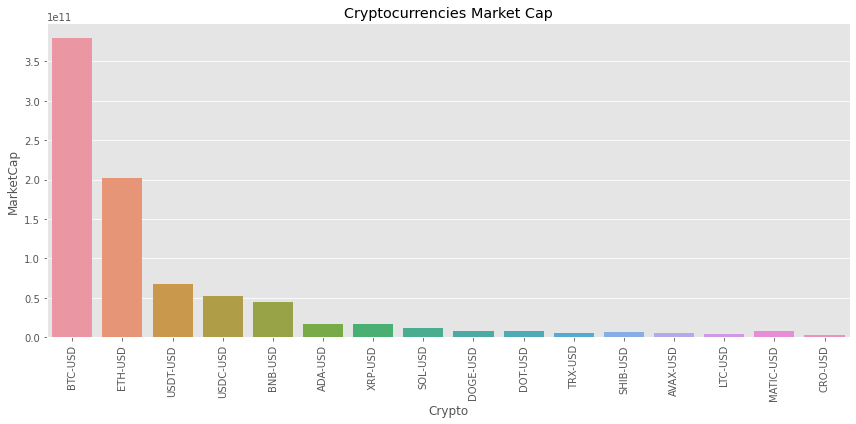

In [17]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x=crypto_df['Crypto'], y=crypto_df['MarketCap'])
plt.title('Cryptocurrencies Market Cap')
plt.xticks(rotation='vertical')
plt.tight_layout()

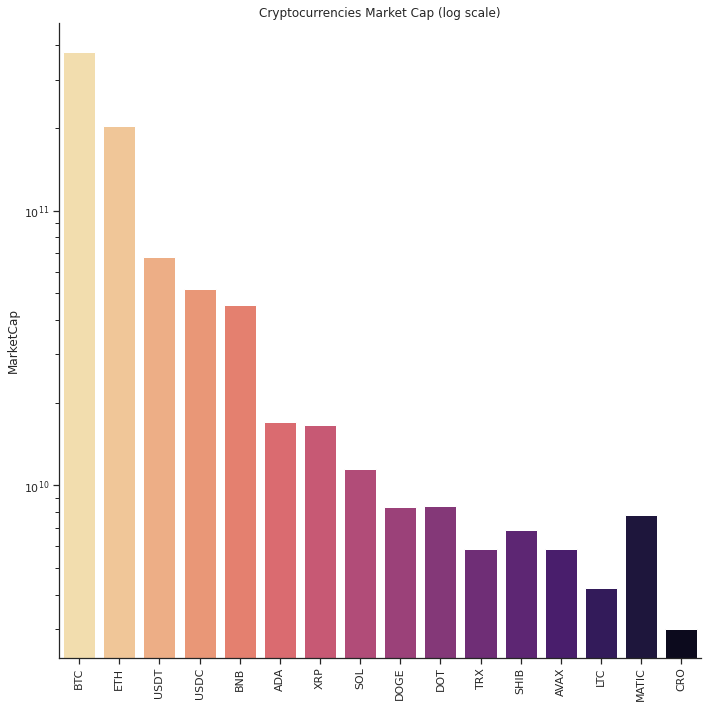

In [18]:
crypto_labels = []

for k in crypto_df['Crypto']:
  i = k.find('-')
  crypto_labels.append(k[:i])

plt.figure(figsize=(10, 10))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

sns.barplot(x=crypto_labels, y=crypto_df['MarketCap'], palette="magma_r")
plt.yscale('log')
plt.title('Cryptocurrencies Market Cap (log scale)')
plt.xticks(rotation='vertical')
plt.tight_layout()

In [19]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Market cap comparison')

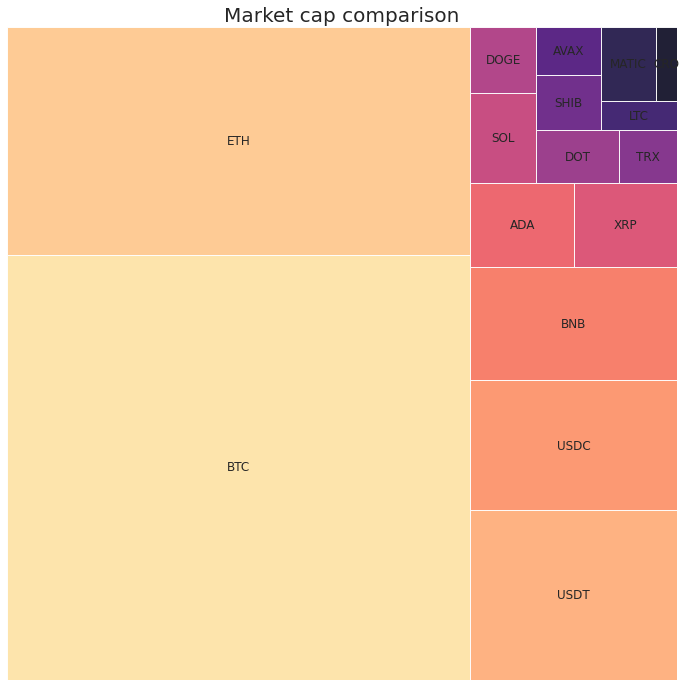

In [20]:
import squarify as sq

plt.figure(figsize=(12, 12))
plt.axis("off")

ax = sq.plot(sizes=crypto_df['MarketCap'], 
            label=crypto_labels,
            color=sns.color_palette("magma_r", 
                                     len(crypto_df['MarketCap'])),
            alpha=0.9
            )
ax.set_title('Market cap comparison', fontsize=20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


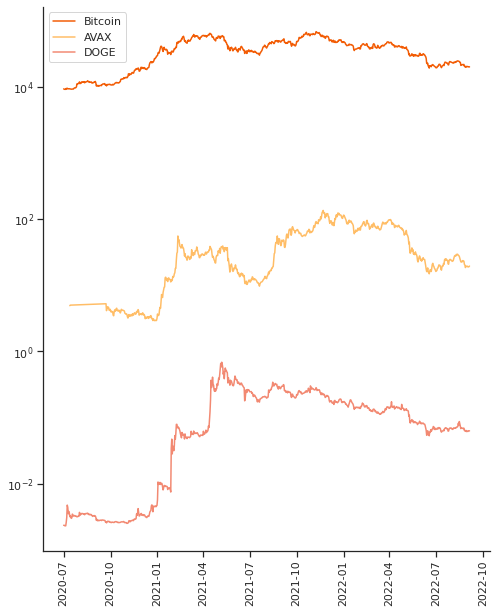

In [21]:
yf.pdr_override()

avax_data = pd.get_data_yahoo("AVAX-USD", start=start, end=end)
doge_data = pd.get_data_yahoo("DOGE-USD", start=start, end=end)

btc_data_loc = btc_data.loc['2020-07-01':]
avax_data_loc = avax_data.loc['2020-07-01':]
doge_data_loc = doge_data.loc['2020-07-01':]

plt.figure(figsize=(8, 10))

plt.yscale('log')

plt.plot(btc_data_loc.index.values, btc_data_loc['Close'], label='Bitcoin', color='#F25C05')
plt.plot(avax_data_loc.index.values, avax_data_loc['Close'], label='AVAX', color='#FFBD66')
plt.plot(doge_data_loc.index.values, doge_data_loc['Close'], label='DOGE', color='#F28972')

plt.legend()

plt.xticks(rotation='vertical')
plt.show()

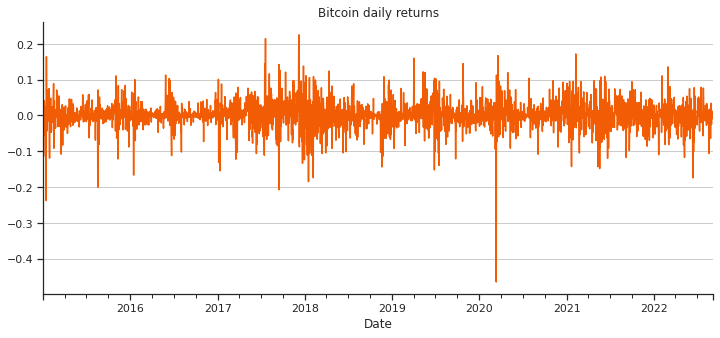

In [22]:
import numpy as np

d = {'BTC': btc_data['Close']}
btc_prev = pa.DataFrame(data=d)

btc_prev['daily_return'] = np.log(btc_prev['BTC']/ btc_prev['BTC'].shift(1))
btc_prev.dropna(inplace = True)

plt.figure(figsize=(12, 5))

btc_prev['daily_return'].plot(title='Bitcoin daily returns', color='#F25C05')

plt.grid(axis='y')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


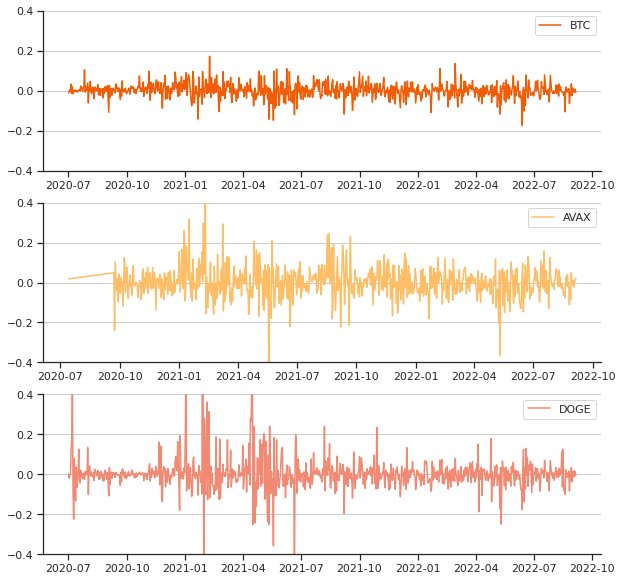

In [23]:

start_ = datetime(2018, 1, 1)
end_ = date.today()

btc_data_ = btc_data.loc['2020-07-01':]

b = {'BTC': btc_data_['Close']}
btc_prev = pa.DataFrame(data=b)

btc_prev['daily_return'] = np.log(btc_prev['BTC']/ btc_prev['BTC'].shift(1))
btc_prev.dropna(inplace = True)


avax_data = pd.get_data_yahoo("AVAX-USD", start=start_, end=end_)
avax_data = avax_data.loc['2020-07-01':]
x = {'AVAX': avax_data['Close']}
avax_prev = pa.DataFrame(data=x)

avax_prev['daily_return'] = np.log(avax_prev['AVAX']/ avax_prev['AVAX'].shift(1))
avax_prev.dropna(inplace = True)


doge_data = pd.get_data_yahoo("DOGE-USD", start=start_, end=end_)
doge_data = doge_data.loc['2020-07-01':]
d = {'DOGE': doge_data['Close']}
doge_prev = pa.DataFrame(data=d)

doge_prev['daily_return'] = np.log(doge_prev['DOGE']/ doge_prev['DOGE'].shift(1))
doge_prev.dropna(inplace = True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))

ax1.plot(btc_prev['daily_return'], label='BTC', color='#F25C05')
ax2.plot(avax_prev['daily_return'], label='AVAX', color='#FFBD66')
ax3.plot(doge_prev['daily_return'], label='DOGE', color='#F28972')

ax1.set_ylim([-0.4, 0.4])
ax2.set_ylim([-0.4, 0.4])
ax3.set_ylim([-0.4, 0.4])

ax1.legend()
ax2.legend()
ax3.legend()

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')

plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


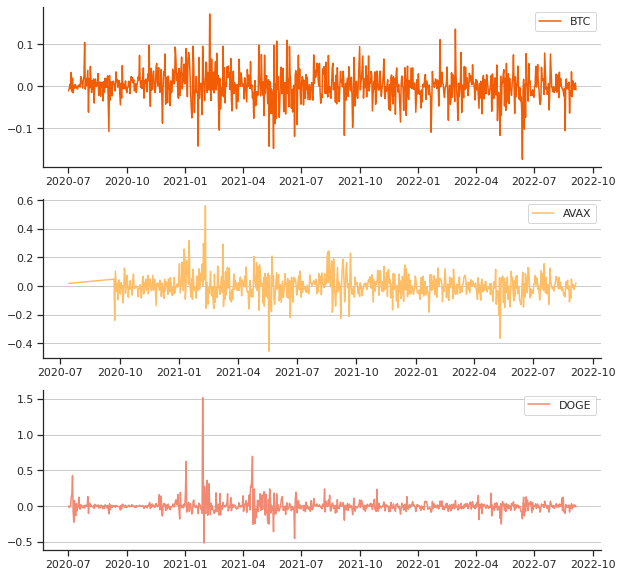

In [24]:

start_ = datetime(2018, 1, 1)
end_ = date.today()

btc_data_ = btc_data.loc['2020-07-01':]

b = {'BTC': btc_data_['Close']}
btc_prev = pa.DataFrame(data=b)

btc_prev['daily_return'] = np.log(btc_prev['BTC']/ btc_prev['BTC'].shift(1))
btc_prev.dropna(inplace = True)


avax_data = pd.get_data_yahoo("AVAX-USD", start=start_, end=end_)
avax_data = avax_data.loc['2020-07-01':]
x = {'AVAX': avax_data['Close']}
avax_prev = pa.DataFrame(data=x)

avax_prev['daily_return'] = np.log(avax_prev['AVAX']/ avax_prev['AVAX'].shift(1))
avax_prev.dropna(inplace = True)


doge_data = pd.get_data_yahoo("DOGE-USD", start=start_, end=end_)
doge_data = doge_data.loc['2020-07-01':]
d = {'DOGE': doge_data['Close']}
doge_prev = pa.DataFrame(data=d)

doge_prev['daily_return'] = np.log(doge_prev['DOGE']/ doge_prev['DOGE'].shift(1))
doge_prev.dropna(inplace = True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))

ax1.plot(btc_prev['daily_return'], label='BTC', color='#F25C05')
ax2.plot(avax_prev['daily_return'], label='AVAX', color='#FFBD66')
ax3.plot(doge_prev['daily_return'], label='DOGE', color='#F28972')
'''
ax1.set_ylim([-0.4, 0.4])
ax2.set_ylim([-0.4, 0.4])
ax3.set_ylim([-0.4, 0.4])
'''
ax1.legend()
ax2.legend()
ax3.legend()

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')

plt.show()

## Fetching and plotting S&P 500 dataset

Through the same libraries we also retrieve and plotting the data relating to the **S&P 500**.

In [25]:
yf.pdr_override()

sp500 = pd.get_data_yahoo("^GSPC", start=start, end=end)
sp500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


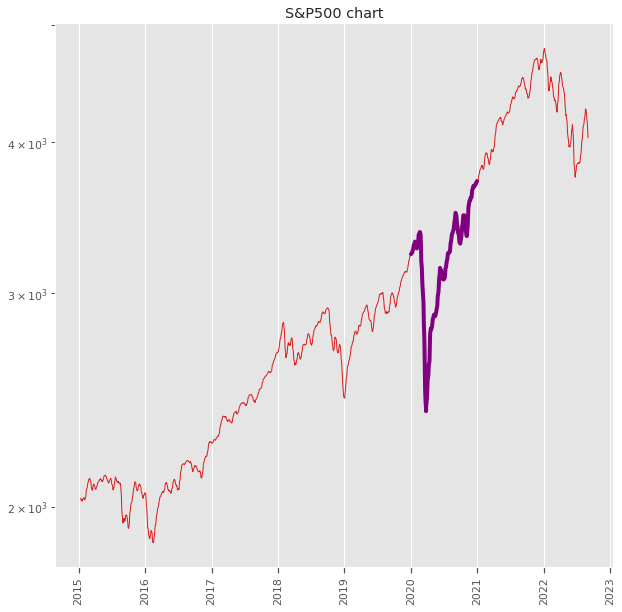

In [26]:
sp500_ = sp500.rolling(8).mean()

pre_sp_2020 = sp500_.loc[:'2019-12-31']
in_sp_2020 = sp500_.loc['2020-01-01':'2020-12-31']
post_sp_2020 = sp500_.loc['2021-01-01':]

style.use('ggplot')
fig, ax2 = plt.subplots(figsize=(10,10))

ax2.set_yscale('log')

ax2.plot(pre_sp_2020.index.values, pre_sp_2020['Close'], linewidth=1, color='#D91E1E')
ax2.plot(in_sp_2020.index.values, in_sp_2020['Close'], linewidth=4, color='#800080')
ax2.plot(post_sp_2020.index.values, post_sp_2020['Close'], linewidth=1, color='#D91E1E')

plt.title('S&P500 chart')
plt.xticks(rotation='vertical')

style.use('ggplot')
plt.show()

## Data comaprison

We are ready to compare and analyze similarities and differences between **Bitcoin** and the **S&P 500**.

<function matplotlib.pyplot.show(*args, **kw)>

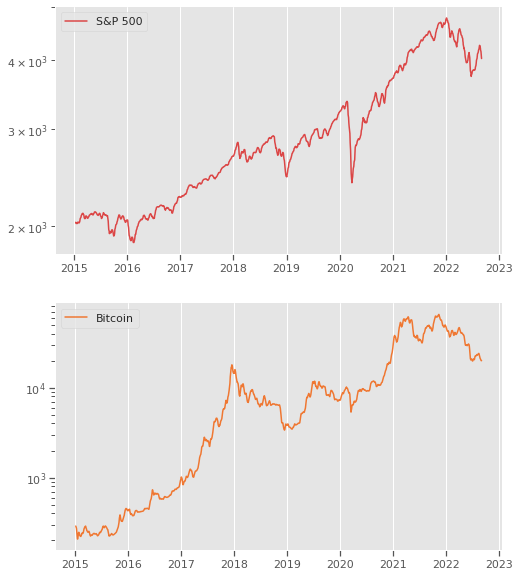

In [27]:
style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,10))

ax1.plot(sp500_.index.values, sp500_['Close'], label='S&P 500', color='#D91E1E', alpha=0.8)
ax2.plot(btc.index.values, btc['Close'], label='Bitcoin', color='#F25C05', alpha=0.8)

ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.grid(axis='y')
ax2.grid(axis='y')

ax1.legend()
ax2.legend()

plt.show

In [28]:
s = {'S&P500': sp500['Close']}
sp_prev = pa.DataFrame(data=s)

sp_prev['daily_return'] = np.log(sp_prev['S&P500']/ sp_prev['S&P500'].shift(1))
sp_prev.dropna(inplace = True)

d = {'BTC': btc_data['Close']}
btc_prev = pa.DataFrame(data=d)

btc_prev['daily_return'] = np.log(btc_prev['BTC']/ btc_prev['BTC'].shift(1))
btc_prev.dropna(inplace = True)

data = {'S&P500':sp_prev['daily_return'],'BTC':btc_prev['daily_return']}
df = pa.DataFrame(data)

df.corr()

,S&P500,BTC
S&P500,1.000000,0.215458
BTC,0.215458,1.000000


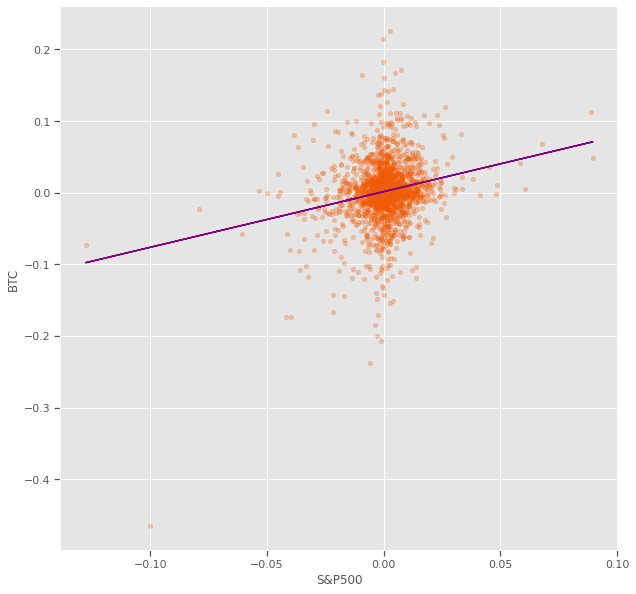

In [29]:
df.dropna(inplace = True)

reg = np.polyfit(df['S&P500'], df['BTC'], deg=1)
ax = df.plot(kind='scatter', x='S&P500', y='BTC', figsize=(10,10), color='#F25C05', alpha=0.3)
ax.plot(df['S&P500'], np.polyval(reg, df['S&P500']), color='#800080')

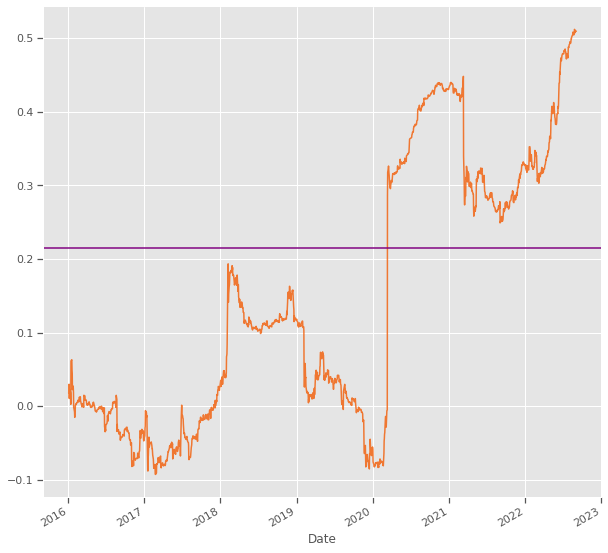

In [30]:
ax = df['S&P500'].rolling(window=252).corr(df['BTC']).plot(figsize=(10,10), color='#F25C05', alpha=0.8)
ax.axhline(df.corr().iloc[0,1], color='#800080')

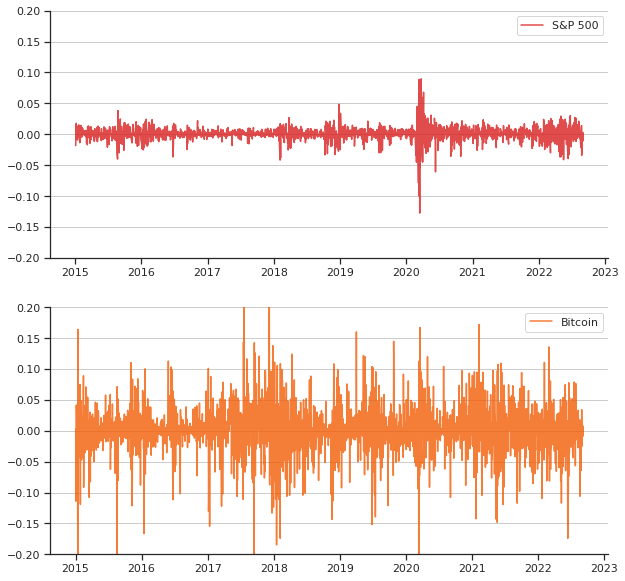

In [38]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

ax1.plot(sp_prev['daily_return'], label='S&P 500', color='#D91E1E', alpha=0.8)
ax2.plot(btc_prev['daily_return'], label='Bitcoin', color='#F25C05', alpha=0.8)

ax1.set_ylim([-0.2, 0.2])
ax2.set_ylim([-0.2, 0.2])

ax1.legend()
ax2.legend()

ax1.grid(axis='y')
ax2.grid(axis='y')

plt.show()

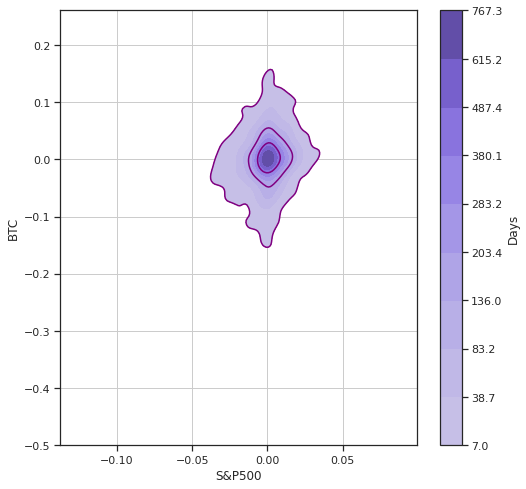

In [42]:
plt.figure(figsize=(8,8))
plt.grid()

sns.set_theme(style='ticks', palette='magma')
sns.kdeplot(
    data=df, 
    x='S&P500', y='BTC', 
    fill=True, cbar=True,
    cbar_kws={'label': 'Days'}
    )

sns.kdeplot(
    data=df, 
    x='S&P500', y='BTC', 
    levels=4,
    color='#800080',
    )

Text(0.5, 1.0, 'BTC')

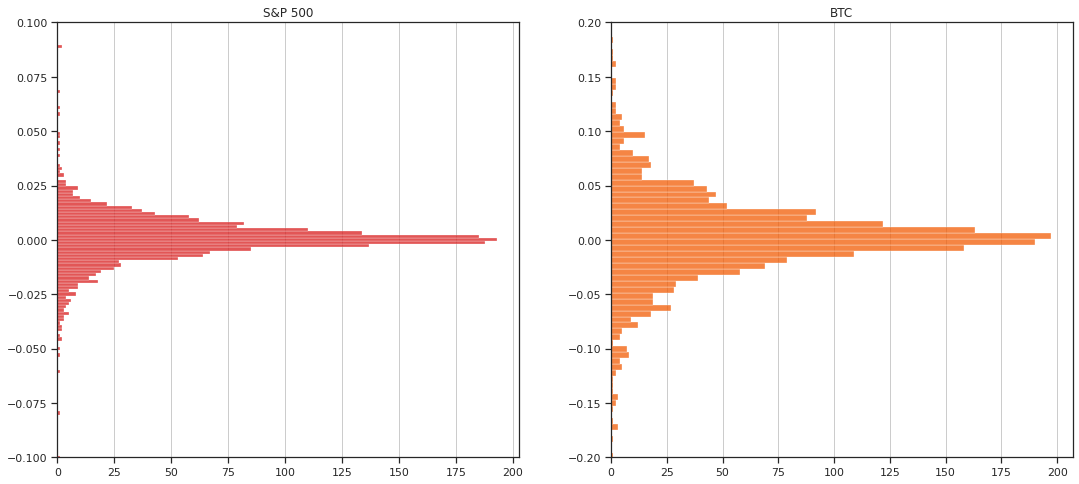

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 8))

plt.subplots_adjust(right=1.3)

sns.histplot(data=df['S&P500'],
             y=df['S&P500'],
             
             color='#D91E1E',
             ax=ax1
             )

sns.histplot(data=df['BTC'],
             y=df['BTC'],
             
             color='#F25C05',
             ax=ax2
             )

ax1.set_ylim([-0.1, 0.1])
ax2.set_ylim([-0.2, 0.2])
'''
ax1.set_xlim([0, 300])
ax2.set_xlim([0, 300])
'''
ax1.grid(axis='x')
ax2.grid(axis='x')

ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')

ax1.set_title('S&P 500')
ax2.set_title('BTC')

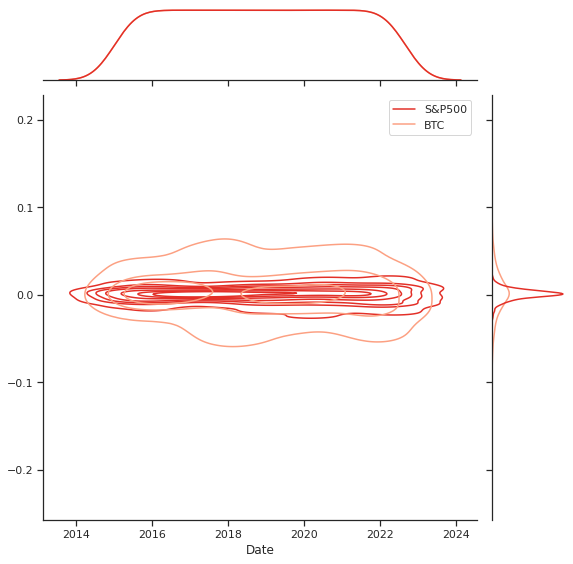

In [50]:
df_ = df.rolling(2).mean()

sns.jointplot(
    data=df_,
    kind='kde',
    height=8,
    palette='Reds_r',
    levels=8
)

## Covid crash

Let's now analyze a specific period, the covid crash.



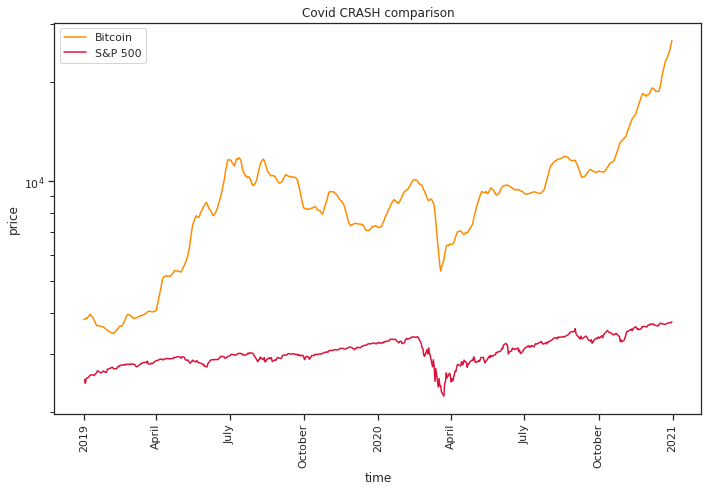

In [35]:
covid_sp = sp500.loc['2019-01-01':'2020-12-31']
covid_btc = btc.loc['2019-01-01':'2020-12-31']

fig, ax = plt.subplots(figsize=(10, 7))

ax.set_yscale('log')

ax.plot(np.datetime_as_string(covid_btc.index.values, unit='D'), covid_btc['Close'], color='darkorange')
ax.plot(np.datetime_as_string(covid_sp.index.values, unit='D'), covid_sp['Close'], color='crimson')

ticks = ['2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01']
tick_labels = ['2019', 'April', 'July', 'October', '2020', 'April', 'July', 'October', '2021']

plt.title('Covid CRASH comparison')

plt.xticks(ticks, rotation='vertical')
ax.set_xticklabels(tick_labels)

ax.set_xlabel('time')
ax.set_ylabel('price')
ax.legend(['Bitcoin', 'S&P 500'])

plt.tight_layout()

plt.show()

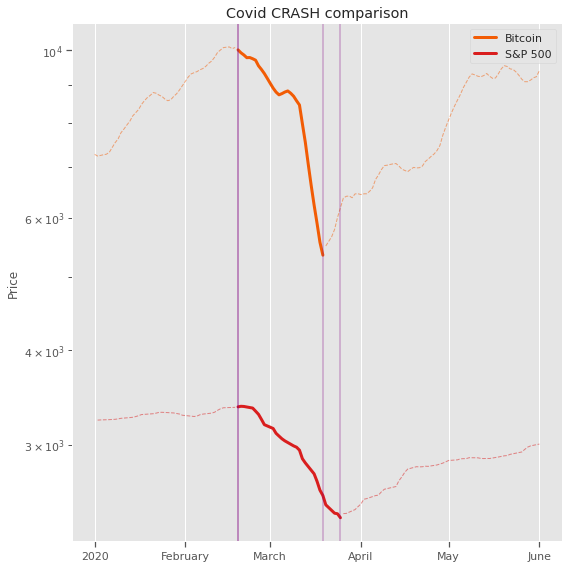

In [36]:
style.use('ggplot')

plt.figure(figsize=(8,8))
plt.yscale('log')

pre_covid_sp = sp500_.loc['2020-01-01':'2020-02-18']
in_covid_sp = sp500_.loc['2020-02-19':'2020-03-25']
post_covid_sp = sp500_.loc['2020-03-26':'2020-06-01']

pre_covid_btc = btc.loc['2020-01-01':'2020-02-18']
in_covid_btc = btc.loc['2020-02-19':'2020-03-19']
post_covid_btc = btc.loc['2020-03-20':'2020-06-01']

ticks = ['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01']
tick_labels = ['2020', 'February', 'March', 'April', 'May', 'June']

plt.plot(np.datetime_as_string(pre_covid_btc.index.values, unit='D'), pre_covid_btc['Close'], linewidth=1, color='#F25C05', alpha=0.5, linestyle='--')
plt.plot(np.datetime_as_string(in_covid_btc.index.values, unit='D'), in_covid_btc['Close'], linewidth=3, color='#F25C05', label="Bitcoin")
plt.plot(np.datetime_as_string(post_covid_btc.index.values, unit='D'), post_covid_btc['Close'], linewidth=1, color='#F25C05', alpha=0.5, linestyle='--')

plt.plot(np.datetime_as_string(pre_covid_sp.index.values, unit='D'), pre_covid_sp['Close'], linewidth=1, color='#D91E1E', alpha=0.5, linestyle='--')
plt.plot(np.datetime_as_string(in_covid_sp.index.values, unit='D'), in_covid_sp['Close'], linewidth=3, color='#D91E1E', label="S&P 500")
plt.plot(np.datetime_as_string(post_covid_sp.index.values, unit='D'), post_covid_sp['Close'], linewidth=1, color='#D91E1E', alpha=0.5, linestyle='--')

plt.xticks(ticks=ticks, labels=tick_labels)

plt.title('Covid CRASH comparison')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.axvline('2020-02-19', color='#800080', alpha=0.3)
plt.axvline('2020-02-19', color='#800080', alpha=0.3)
plt.axvline('2020-03-25', color='#800080', alpha=0.3)
plt.axvline('2020-03-19', color='#800080', alpha=0.3)

plt.show()

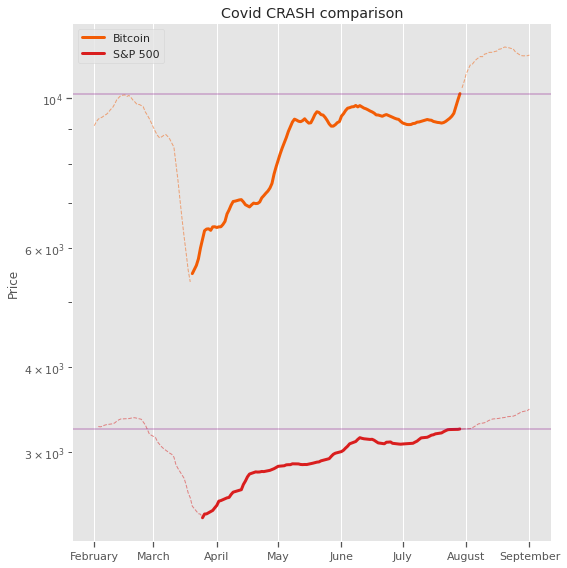

In [37]:
style.use('ggplot')

plt.figure(figsize=(8,8))
plt.yscale('log')

pre_covid_sp = sp500_.loc['2020-02-01':'2020-03-25']
in_covid_sp = sp500_.loc['2020-03-25':'2020-07-29']
post_covid_sp = sp500_.loc['2020-07-30':'2020-09-01']

pre_covid_btc = btc.loc['2020-02-01':'2020-03-19']
in_covid_btc = btc.loc['2020-03-20':'2020-07-29']
post_covid_btc = btc.loc['2020-07-30':'2020-09-01']

ticks = ['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01']
tick_labels = ['February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

plt.plot(np.datetime_as_string(pre_covid_btc.index.values, unit='D'), pre_covid_btc['Close'], linewidth=1, color='#F25C05', alpha=0.5, linestyle='--')
plt.plot(np.datetime_as_string(in_covid_btc.index.values, unit='D'), in_covid_btc['Close'], linewidth=3, color='#F25C05', label="Bitcoin")
plt.plot(np.datetime_as_string(post_covid_btc.index.values, unit='D'), post_covid_btc['Close'], linewidth=1, color='#F25C05', alpha=0.5, linestyle='--')

plt.plot(np.datetime_as_string(pre_covid_sp.index.values, unit='D'), pre_covid_sp['Close'], linewidth=1, color='#D91E1E', alpha=0.5, linestyle='--')
plt.plot(np.datetime_as_string(in_covid_sp.index.values, unit='D'), in_covid_sp['Close'], linewidth=3, color='#D91E1E', label="S&P 500")
plt.plot(np.datetime_as_string(post_covid_sp.index.values, unit='D'), post_covid_sp['Close'], linewidth=1, color='#D91E1E', alpha=0.5, linestyle='--')

plt.xticks(ticks=ticks, labels=tick_labels)

plt.title('Covid CRASH comparison')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')


plt.axhline(in_covid_sp['Close'].iloc[len(in_covid_sp)-1], color='#800080', alpha=0.3)
plt.axhline(in_covid_btc['Close'].iloc[len(in_covid_btc)-1], color='#800080', alpha=0.3)

plt.show()